In [18]:
import mne
import os

subject =  'pilot14'
session = '03'


folder = fr"C:\Users\victor.ferat\Documents\Soraya\NBF\data\sub-{subject}\ses-{session}/eeg"

tmin = 0
tmax = 0
raws = list()

metadatas = list()
for file in os.listdir(folder):
    if file.endswith('.fif'):
        file_path = os.path.join(folder, file)
        raw = mne.io.read_raw_fif(file_path)
        raw.pick_types(eeg=True, stim=False)
        metadata = dict()
        metadata['subject'] = file.split('_')[0].split('-')[1]
        metadata['session'] = file.split('_')[1].split('-')[1]
        metadata['task'] = file.split('_')[2].split('-')[1]
        metadata['run'] = file.split('_')[3].split('-')[1]
        if metadata['task'] in ['baseline', 'neurofeedback', 'restingstate', 'transfer']:
            tmin = tmax
            tmax = tmax + raw.times[-1]
            metadata['tmin'] = tmin
            metadata['tmax'] = tmax
            metadatas.append(metadata)
            raws.append(raw)
raw = mne.concatenate_raws(raws, preload=True)
raw.filter(1, 40)
raw.notch_filter([50, 100])

if 'PO10' in raw.ch_names:
    raw.rename_channels({'PO10': 'ecg'})
    raw.set_channel_types({'ecg': 'ecg'})
raw.set_montage('standard_1020')

C:\Users\victor.ferat\AppData\Local\Temp\ipykernel_1160\3420032701.py:32: RuntimeWarning: raw files do not all have the same data format, could result in precision mismatch. Setting raw.orig_format="unknown"
  raw = mne.concatenate_raws(raws, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,34 points
Good channels,"31 EEG, 1 ECG"
Bad channels,None
EOG channels,Not available
ECG channels,ecg
Sampling frequency,500.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


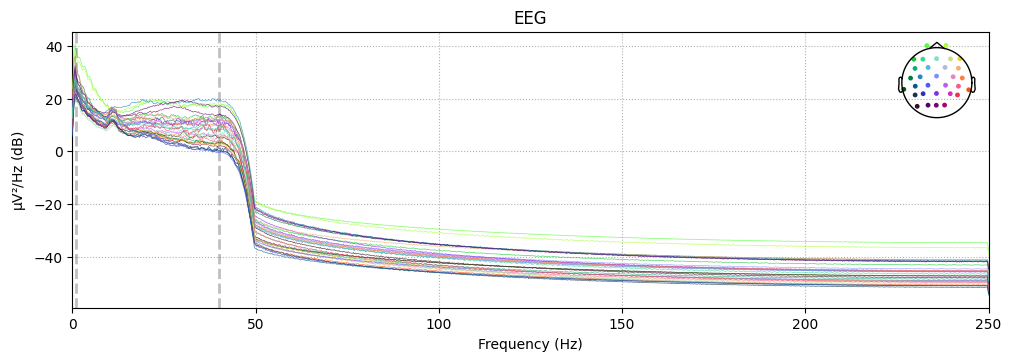

In [2]:
%matplotlib qt
raw.copy().set_eeg_reference('average').plot_psd()

In [3]:
raw.plot(precompute=False, scalings='auto')

Using qt as 2D backend.


Channels marked as bad:
['C3']


In [4]:
raw.save(f'sub-{subject}_ses-{session}_annotated-raw.fif', overwrite=True)

Writing c:\Users\victor.ferat\Documents\GitHub\neuxus_test\sub-pilot14_ses-01_annotated-raw.fif
Closing c:\Users\victor.ferat\Documents\GitHub\neuxus_test\sub-pilot14_ses-01_annotated-raw.fif
[done]


In [5]:
from mne.preprocessing import ICA

rank = mne.compute_rank(raw)
ica = ICA(n_components=rank['eeg'], random_state=42, method='infomax', fit_params=dict(extended=True))
ica.fit(raw)

Computing rank from data with rank=None
Omitting 35371 of 1298800 (2.72%) samples, retaining 1263429 (97.28%) samples.
    Using tolerance 1.4e-10 (2.2e-16 eps * 30 dim * 2.2e+04  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Omitting 35371 of 1298800 (2.72%) samples, retaining 1263429 (97.28%) samples.
Selecting by number: 30 components
Computing Extended Infomax ICA
Fitting ICA took 249.5s.


Method,infomax
Fit parameters,extended=Truemax_iter=500
Fit,500 iterations on raw data (1263429 samples)
ICA components,30
Available PCA components,30
Channel types,eeg
ICA components marked for exclusion,—


In [6]:
%matplotlib qt
ica.plot_components(inst=raw)

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x496 with 9 Axes>]

In [6]:
ica.plot_sources(inst=raw) #gbhfgh

Creating RawArray with float64 data, n_channels=31, n_times=1298800
    Range : 0 ... 1298799 =      0.000 ...  2597.598 secs
Ready.


In [7]:
raw_ica = ica.apply(raw.copy())
raw_ica.interpolate_bads()
raw_ica.set_eeg_reference('average')

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 96.6 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,34 points
Good channels,"31 EEG, 1 ECG"
Bad channels,None
EOG channels,Not available
ECG channels,ecg
Sampling frequency,500.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 35371 of 1298800 (2.72%) samples to NaN, retaining 1263429 (97.28%) samples.
Effective window size : 4.096 (s)


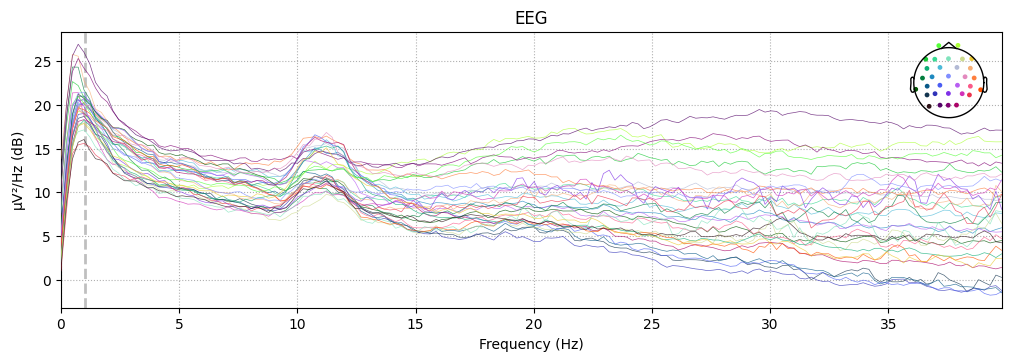

In [8]:
raw_ica.plot_psd(fmin=0, fmax=40)

In [9]:
raw_ica.save(fr'sub-{subject}_ses-{session}_annotated-preproc-raw.fif', overwrite=True)

Writing c:\Users\victor.ferat\Documents\GitHub\neuxus_test\sub-pilot14_ses-01_annotated-preproc-raw.fif
Closing c:\Users\victor.ferat\Documents\GitHub\neuxus_test\sub-pilot14_ses-01_annotated-preproc-raw.fif
[done]


In [139]:
raw_ica.plot(precompute=False)

In [10]:
## Topomaps
import mne
import numpy as np
import matplotlib.pyplot as plt

bands = {'alpha': (8, 13)}

# All runs
idx = ['restingstate_EO']
for i in range(15):
    i_ = i+1
    idx.append(f'baseline_{i_:02d}')
    idx.append(f'neurofeedback_{i_:02d}')


fig, axes = plt.subplots(1, len(idx), figsize=(30, 5))

m = 0
for index in idx:
    task, run = index.split('_')
    for met in metadatas:
        cmap = 'Reds' if task == 'baseline' else 'Blues' if task == 'neurofeedback' else 'Greens'
        if met['task'] != 'restingstate':
            if (met['task'] == task) and (met['run'] == run):
                metadata = met
                ax = axes[m]
                raw_ = raw_ica.copy().crop(metadata['tmin'], metadata['tmax'])
                psd = raw_.compute_psd(fmin=bands['alpha'][0], fmax=bands['alpha'][1])
                data = np.mean(psd.get_data(), axis=1)
                mne.viz.plot_topomap(data, raw_.info, axes=ax, cmap=cmap)
        else:
            metadata = met
            ax = axes[m]
            metadata['run'] = 'EO'
            raw_ = raw_ica.copy().crop(metadata['tmin'], metadata['tmin'] + 180)
            psd = raw_.compute_psd(fmin=bands['alpha'][0], fmax=bands['alpha'][1])
            data = np.mean(psd.get_data(), axis=1)
            mne.viz.plot_topomap(data, raw_.info, axes=ax, cmap=cmap)
    m += 1    
    del metadata

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Setting 403 of 57650 (0.70%) samples to NaN, retaining 57247 (99.30%) samples.
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Setting 721 of 57600 (1.25%) samples to NaN, retaining 56879 (98.75%) samples.
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Setting 982 of 17250 (5.69%) samples to NaN, retaining 16268 (94.31%) samples.
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Setting 1271 of 57000 (2.23%) samples to NaN, retaining 55729 (97.77%) samples.
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Setting 2434 of 17300 (14.07%) samples to NaN, retaining 14866 (85.93%) samples.
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Setting 1476 of 57700 (2.56%) samples to NaN, retaining 56224 (97.44%) samples.
Effective wi

In [11]:
## Topomaps
import mne
import numpy as np

bands = {'alpha': (8, 13)}
# Get RS topomap

for metadata in metadatas:
    if metadata['task'] == 'restingstate':
        raw_ = raw_ica.copy().crop(metadata['tmin'], metadata['tmin'] + 180)
        psd = raw_.compute_psd(fmin=bands['alpha'][0], fmax=bands['alpha'][1])
        data_ref = np.mean(psd.get_data(), axis=1)

# All runs
idx = ['baseline_01',
        'neurofeedback_01',
        'baseline_02',
        'neurofeedback_02',
        'baseline_03',
        'neurofeedback_03',
        'baseline_04',
        'neurofeedback_04',
        'baseline_05',
        'neurofeedback_05',
        'baseline_06',
        'neurofeedback_06',
        'baseline_07',
        'neurofeedback_07',
        'baseline_08',
        'neurofeedback_08',
        'baseline_09',
        'neurofeedback_09',
        'baseline_10',
        'transfer_01',
        'baseline_11',
        'transfer_02',
        'baseline_12',
        'transfer_03',
        'baseline_13',
        'neurofeedback_10',
        'baseline_14',
        'neurofeedback_11',
        'baseline_15',
        'neurofeedback_12']


fig, axes = plt.subplots(1, len(idx), figsize=(30, 5))

m = 0
for index in idx:
    task, run = index.split('_')
    cmap = 'BrBG' if task == 'baseline' else 'RdBu' if task == 'neurofeedback' else 'PuOr'
    for metadata in metadatas:
        if (metadata['task'] == task) and (metadata['run'] == run):
            ax = axes[m]
            raw_ = raw_ica.copy().crop(metadata['tmin'], metadata['tmax'])
            psd = raw_.compute_psd(fmin=bands['alpha'][0], fmax=bands['alpha'][1])
            data = np.mean(psd.get_data(), axis=1) - data_ref
            mne.viz.plot_topomap(data, raw_.info, axes=ax, cmap=cmap)
    m += 1    

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Setting 403 of 57650 (0.70%) samples to NaN, retaining 57247 (99.30%) samples.
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Setting 721 of 57600 (1.25%) samples to NaN, retaining 56879 (98.75%) samples.
Effective window size : 4.096 (s)
Setting 982 of 17250 (5.69%) samples to NaN, retaining 16268 (94.31%) samples.
Effective window size : 4.096 (s)
Setting 1271 of 57000 (2.23%) samples to NaN, retaining 55729 (97.77%) samples.
Effective window size : 4.096 (s)
Setting 2434 of 17300 (14.07%) samples to NaN, retaining 14866 (85.93%) samples.
Effective window size : 4.096 (s)
Setting 1476 of 57700 (2.56%) samples to NaN, retaining 56224 (97.44%) samples.
Effective window size : 4.096 (s)
Setting 755 of 17300 (4.36%) samples to NaN, retaining 16545 (95.64%) samples.
Effective window size : 4.096 (s)
Setting 571 of 57450 (0.99%) samples to NaN, retaining 56879 (99.01%) samples.
Effective window size : 

In [13]:
import mne
import numpy as np
# Define the electrodes of interest
electrodes_OI_right = ['P4', 'P8', 'O2']
electrodes_OI_left = ['P3', 'P7', 'O1']
freqs = [8, 13]
# Compute the alpha power on average for the specified electrodes
duration = 2

psds = list()
for metadata in metadatas:
    if metadata['task'] != 'restingstate':
        raw_ = raw_ica.copy().crop(metadata['tmin'], metadata['tmax'])
        epochs_ = mne.make_fixed_length_epochs(raw_, duration=duration, overlap=0.5, preload=False)
        epochs_ = epochs_.drop_bad()
        if len(epochs_):
            tf = mne.time_frequency.psd_array_welch(epochs_.get_data( picks=electrodes_OI_right), raw.info['sfreq'], fmin=freqs[0], fmax=freqs[1],)
            alpha_power_right = np.average(np.average(tf[0], axis=2), axis=1)
        
            tf = mne.time_frequency.psd_array_welch(epochs_.get_data( picks=electrodes_OI_left), raw.info['sfreq'], fmin=freqs[0], fmax=freqs[1],)
            alpha_power_left = np.average(np.average(tf[0], axis=2), axis=1)
        
            metadata['alpha_power_right_dist'] = alpha_power_right
            metadata['alpha_power_left_dist'] = alpha_power_left
            metadata['alpha_power_right'] = np.average(alpha_power_right)
            metadata['alpha_power_left'] = np.average(alpha_power_left)
            
            for right, left  in zip(alpha_power_right, alpha_power_left):
                p = {'power': right - left,
                    'side': 'right - left',
                     'run': metadata['run'],
                     'task': metadata['task']}
                psds.append(p)
    else:
        # EO
        metadata['run'] = 'EO'
        raw_ = raw_ica.copy().crop(metadata['tmin'], metadata['tmin'] + 180)
        epochs_ = mne.make_fixed_length_epochs(raw_, duration=duration, overlap=0.5, preload=False)
        epochs_ = epochs_.drop_bad()
        if len(epochs_):
            tf = mne.time_frequency.psd_array_welch(epochs_.get_data( picks=electrodes_OI_right), raw.info['sfreq'], fmin=freqs[0], fmax=freqs[1],)
            alpha_power_right = np.average(np.average(tf[0], axis=2), axis=1)
        
            tf = mne.time_frequency.psd_array_welch(epochs_.get_data( picks=electrodes_OI_left), raw.info['sfreq'], fmin=freqs[0], fmax=freqs[1],)
            alpha_power_left = np.average(np.average(tf[0], axis=2), axis=1)
        
            metadata['alpha_power_right_dist'] = alpha_power_right
            metadata['alpha_power_left_dist'] = alpha_power_left
            metadata['alpha_power_right'] = np.average(alpha_power_right)
            metadata['alpha_power_left'] = np.average(alpha_power_left)
            
            for right, left  in zip(alpha_power_right, alpha_power_left):
                p = {'power': right - left,
                     'side': 'right - left',
                     'run': metadata['run'],
                     'task': metadata['task']}
                psds.append(p)
                
        # EC
        metadata['run'] = 'EC'
        raw_ = raw_ica.copy().crop(metadata['tmin'] + 180, metadata['tmax'])
        epochs_ = mne.make_fixed_length_epochs(raw_, duration=duration, overlap=0.5, preload=False)
        epochs_ = epochs_.drop_bad()
        if len(epochs_):
            tf = mne.time_frequency.psd_array_welch(epochs_.get_data( picks=electrodes_OI_right), raw.info['sfreq'], fmin=freqs[0], fmax=freqs[1],)
            alpha_power_right = np.average(np.average(tf[0], axis=2), axis=1)
        
            tf = mne.time_frequency.psd_array_welch(epochs_.get_data( picks=electrodes_OI_left), raw.info['sfreq'], fmin=freqs[0], fmax=freqs[1],)
            alpha_power_left = np.average(np.average(tf[0], axis=2), axis=1)
        
            metadata['alpha_power_right_dist'] = alpha_power_right
            metadata['alpha_power_left_dist'] = alpha_power_left
            metadata['alpha_power_right'] = np.average(alpha_power_right)
            metadata['alpha_power_left'] = np.average(alpha_power_left)
            
            for right, left  in zip(alpha_power_right, alpha_power_left):
                p = {'power': right - left,
                     'side': 'right - left',
                     'run': metadata['run'],
                     'task': metadata['task']}
                psds.append(p)

Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 1000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 22 events and 1000 original time points ...
Effective window size : 0.512 (s)
Using data from preloaded Raw for 22 events and 1000 original time points ...
Effective window size : 0.512 (s)
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 1000 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 21 events and 1000 original time points ...
Effective window size : 0.512 (s)
Using data from preloaded Raw for 21 events and 1000 original time points ...
Effective window size : 0.512 (s)
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22

In [14]:
import pandas as pd
df = pd.DataFrame(psds)

def new(row):
    run = row['run']
    task = row['task']
    if task == 'neurofeedback':
        if run == '10':
            run = '13'
        elif run == '11':
            run = '14'       
        elif run == '12':
            run = '15'
    elif task == 'transfer':
        task = 'neurofeedback'
        if run == '01':
            run = '10'
        elif run == '02':
            run = '11'       
        elif run == '03':
            run = '12'
    return(task, run)

df[['new_task', 'new_run']] = [new(row) for r, row in df.iterrows()]
df['task_run'] = df['new_task'] + '_' + df['new_run']
df

,power,side,run,task,new_task,new_run,task_run
0,-2.591086e-12,right - left,01,baseline,baseline,01,baseline_01
1,-3.748146e-12,right - left,01,baseline,baseline,01,baseline_01
2,4.822510e-12,right - left,01,baseline,baseline,01,baseline_01
3,7.935030e-13,right - left,01,baseline,baseline,01,baseline_01
4,-2.253476e-12,right - left,01,baseline,baseline,01,baseline_01
...,...,...,...,...,...,...,...
1579,-6.354835e-12,right - left,03,transfer,neurofeedback,12,neurofeedback_12
1580,1.995834e-11,right - left,03,transfer,neurofeedback,12,neurofeedback_12
1581,-9.310995e-12,right - left,03,transfer,neurofeedback,12,neurofeedback_12
1582,8.851786e-13,right - left,03,transfer,neurofeedback,12,neurofeedback_12


In [15]:
import dabest
# All runs
idx = ['restingstate_EO', 'restingstate_EC']
for i in range(15):
    i_ = i+1
    idx.append(f'baseline_{i_:02d}')
    idx.append(f'neurofeedback_{i_:02d}')

baseline_repeated_measures = dabest.load(df,
                                         idx=idx,
                                         x="task_run",
                                         y="power")

mean_rest_power = df[df['task_run'] == 'restingstate_EO']['power'].mean()

fig, ax = plt.subplots()
baseline_repeated_measures.mean_diff.plot(color_col='task', ax=ax)
ax.set_title( f'Restingstate power: {mean_rest_power} ({df["side"].values[0]})')

c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\dabest\_classes.py:2042: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(err_temp.substitute(lim_type="lower",
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 95.5% of the points cannot be placed; you may want to decrease the size of the markers or use

Text(0.5, 1.0, 'Restingstate power: 9.664394847471871e-14 (right - left)')

c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 95.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 95.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  

In [17]:
# All runs
idx = ['restingstate_EO']
for i in range(15):
    i_ = i+1
    idx.append(f'neurofeedback_{i_:02d}')

baseline_repeated_measures = dabest.load(df,
                                         idx=idx,
                                         x="task_run",
                                         y="power")

mean_rest_power = df[df['task_run'] == 'restingstate_EO']['power'].mean()

fig, ax = plt.subplots()
baseline_repeated_measures.mean_diff.plot(color_col='task', ax=ax)
ax.set_title( f'Restingstate power: {mean_rest_power} ({df["side"].values[0]})')

c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  

Text(0.5, 1.0, 'Restingstate power: 9.664394847471871e-14 (right - left)')

c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  

c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 75.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  

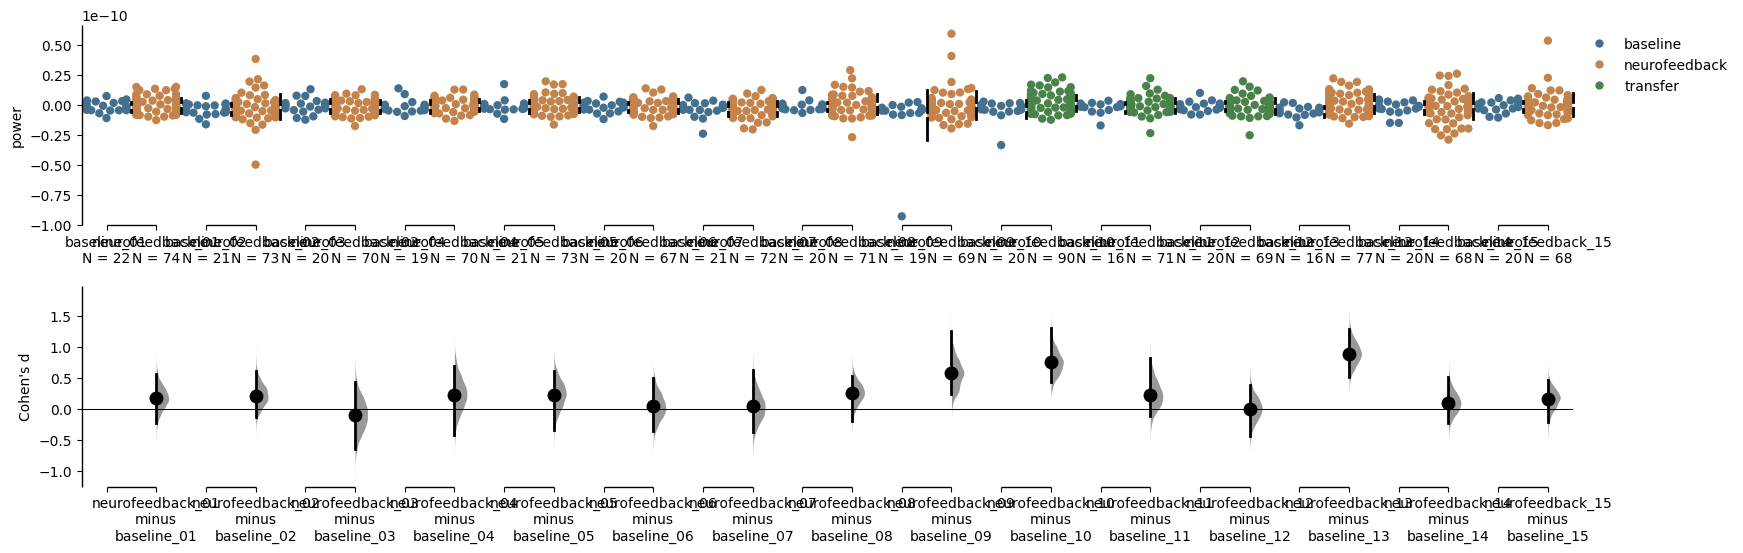

In [16]:
import dabest
import matplotlib.pyplot as plt

runs_nf = df[df['new_task'] == 'neurofeedback']['new_run'].unique()
runs_baseline = df[df['new_task'] == 'baseline']['new_run'].unique()
runs = np.intersect1d(runs_nf, runs_baseline)
runs.sort()
idx = [(f"baseline_{i}", f"neurofeedback_{i}") for i in runs]

unpaired = dabest.load(data = df,
                          idx=idx,
                          x="task_run", y="power")

unpaired.cohens_d.plot(color_col='task')